# Linear Discriminants: logistic regression

$\newcommand{\x}{\mathbf{x}}\newcommand{\w}{\mathbf{w}}\newcommand{\c}{\mathcal{C}}$

As we have seen in the lecture, the logistic regression models the probability of a class label $\c$ given a datapoint $p(\c|\x)$ as:
$$p(\c|\x) = \sigma(\w^\top\x) = \frac{1}{1+e^{-\w^\top\x}}$$

In this lab, we shall implement this model.

## Logistic function

To get started, let us plot the logistic function $\sigma(a)$ in the range $[-5\dots 5]$ in blue, and its derivative $\frac{\partial}{\partial a} \sigma(a)$ in green.

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

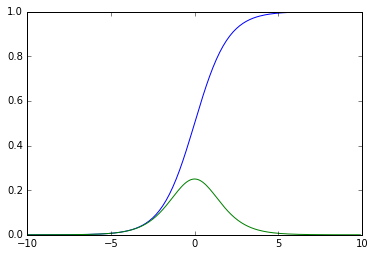

In [3]:
x = np.arange(-10, 10, .1)

def sigma(a):
    return 1.0 / (1.0 + np.exp(-a))

plt.plot(x, sigma(x))
plt.plot(x, sigma(x) * (1 - sigma(x)), 'green')

## Training data

Next, load the data in the provided data file "*data-2class.npz*", and plot it. Then also plot the discriminant of a logistic regression model with parameters $\w = [ 0,1,1]$.


$\frac{1}{1+e^{\w^\top\x}} = 1/2$, so $\exp \w^\top \x = 1$ or $\w^\top\x = 0$. In other words, we can plot 
$w_0+w_1x_1 + w_2x_2 = 0$, or $x_1 = -\frac{w_2x_2+w_0}{w_1}$

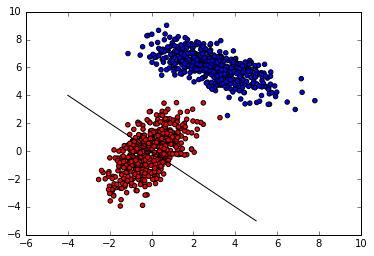

In [6]:
data = np.load("data-2class.npz")
d = data['d']
l = data['l']

colours = [['r', 'b'][int(x)] for x in np.nditer(l)]
plt.scatter(d[:, 0], d[:, 1], 20, colours)

def plotDisc(w):
    if abs(w[1]) > abs(w[2]):
        yr = np.arange(-6, 10, 1)
        xr = -(w[2] * yr + w[0]) / w[1]
        valid  = (xr > -4) & (xr < 10)
        plt.plot(xr[valid], yr[valid], 'k')
    else:
        xr = np.arange(-4, 10, 1)
        yr = -(w[1] * xr + w[0]) / w[2]
        valid  = (yr > -6) & (yr <10)
        plt.plot(xr[valid], yr[valid], 'k')

plotDisc([0, -1., -1.])

# # Probability of the given labels for all datapoints

We will now train our logistic regression model on a training dataset. This dataset contains a number of datapoints $\x_1,\dots,\x_N$belonging to two classes and, for each datapoint $\x_n$, the corresponding class label $l_n$. The training is done by *maximum likelihood*, that is, we maximise the probability of the data given the model. 

## Model

Before we start coding, let's have a closer look at the model. Our labels are $0$ or $1$, representing the two classes. If a datapoint $\x_n$ belongs to class $\c_n=1$, the probability $p(\c_n=1|\x_n) = \sigma(\w^\top\x_n)$ and the probability $p(\c_n=0|\x_n) = 1-\sigma(\w^\top\x)$. We now want the probability of the labels given the data, for the complete training set: $p(\c_1,\dots,\c_N|\x_1,\dots,\x_N)$. Remember that the probability of the union of two independent events is $p(a,b)=p(a)\,p(b)$. Using the fact that the labels are $0$ and $1$ (and that $x^0=1$ and $x^1=x$, we can then write this as 
$$p(\c_1\dots\c_n|\x_1\dots\x_n,\w) = \prod_{n=1}^N \sigma(\w^\top\x_n)^{\c_n}\,(1-\sigma(\w^\top\x_n))^{1-\c_n}$$

**Question [5 Marks]:** For the provided dataset, compute this probability when the model weights are $\w = [ 0,-1,-1]$
Think about how you could find the maximum of this function. What does the gradient of this probability look like?

In [51]:
prob = 1.0
w = np.matrix([[0, -1, -1]])

import random

# Extend the data with a 1 in column 0
v = np.ones((d.shape[0], d.shape[1] + 1))
v[:, 1:] = d

for x, c in zip(v, l):
    s = sigma(sum([a * b for a,b in zip(w.flat, x)]))
    prob *= s**c[0] * (1 - s)**(1 - c[0])
    
print "Probability is (pretty much zero): ", prob
print "Answer: ", "The gradient looks like a hill (?)"

Probability is (pretty much zero):  0.0
Answer:  The gradient looks like a hill (?)


Dealing with the joint probability is complicated, as 1) its value can become very small, easily too small for a computer to represent it accurately, and 2) taking the gradient of this joint probability with respect to $\w$ makes the contribution of every datapoint to the gradient depend on every other datapoint's value.

# Gradient

So instead, we will define an error function which is the natural logarithm of the likelihood.

**Question [5 marks]:** Write down the equation for $E(\w) \triangleq -\log p(\c_1,\dots,\c_N|\x_1,\dots,\x_N)$ in analytical form. 

**Question [5 marks]:** Compute the actual value of the error function for the given dataset and weight $w=[0,-1,-1]$.

Notice that this function does not contain products of probabilities anymore, thus making the derivative of the joint probability with respect of each of the weights a sum of derivatives of the probabilities of single datapoints. The logarithm is what's called a "monotonically increasing function", which means that if $x_1 > x_2$, $f(x_1) > f(x_2)$. Because of that, the value of $\w$ for which $p(\c_1\dots\c_n|\x_1\dots\x_n,\w)$ is maximal is also the value of $\w$ for which $\log p(\c_1\dots\c_n|\x_1\dots\x_n,\w)$ is maximal and thus $-\log p(\c_1\dots\c_n|\x_1\dots\x_n,\w)$ is minimal.

The gradient of $\nabla_\w E(\w)$ is given by $\nabla_\w E(\w) = \sum_{n=1}^N \left(\sigma( \w^\top\x_n)-c_n\right)\x_n$

**Question [30 marks]:** Implement gradient descent, updating the weights as $\w^{\mathrm{new}} = \w^{\mathrm{old}} - \eta \nabla_\w E(\w)$. The value of $\eta$ will affect how fast the algorithm converges and is really up to you. In this case, I suggest you use $\eta=10^{-3}$, which is quite small but allows you to see what's happening. This is a form of batch gradient descent.

In [ ]:
# To be implemented




# Visualising the classifier

It is important to realise that the classifier must be able to compute the probability of a label for any new datapoint, independently of whether it was in the training data or not. We can, therefore, plot what the probability of class $\c_0$ is at any location in the input space. 

**Question [10 marks]:** Create a function that plots the data in a 3D graph in the plane $z=1/2$ and superimpose a wireframe of the probability of $\c_0$. Then adapt your code in the previous question to call this function.

# Stochastic gradient descent

**Question [20 marks]:** As a last question, implement stochastic gradient descent and compare it to batch gradient descent.